### Importación de datos



In [4]:
import pandas as pd
#Importa la librebria que utilizaremos para los graficos
import matplotlib.pyplot as plt
#Importamos la libreria Datetime para manipular las fechas
import numpy as np

Leer datos tabulares

In [5]:
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"


In [21]:
tienda1 = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)
lista_tiendas = [tienda1, tienda2, tienda3, tienda4]
lista_tiendas_string = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']
tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación y costos de envío promedio por tienda


In [20]:
precio_total_tiendas = [sum(tienda1['Precio']),sum(tienda2['Precio']),sum(tienda3['Precio']),sum(tienda4['Precio'])]
costo_envio = [sum(tienda1['Costo de envío']),sum(tienda2['Costo de envío']),sum(tienda3['Costo de envío']),sum(tienda4['Costo de envío'])]
costo_envio_promedio = [round(i/len(tienda1['Calificación']),2) for i in costo_envio]
total_costos = []
for i in range(len(precio_total_tiendas)):
    total_costos.append(precio_total_tiendas[i]-costo_envio[i])

In [22]:
from re import X
def grafico(tienda, precio_total_t, costo_env, total_costos):
  #configuramos la posicion de nuestras barras en el grafico

  x = np.arange(len(tienda))
  #ancho de las barras
  width = 0.25
  fig, ax = plt.subplots(figsize=(12,5))

#Colores distintos para identificar cada año
  colores_2022 = ['lightgray'] * len(tienda)
  colores_2023 = ['skyblue'] * len(tienda)
  colores_2024 = ['lightgreen'] * len(tienda)

#Creamos las barras para cada año desplazadas
  b1 = ax.bar(x - width, precio_total_t, width, label='Ganancias totales', color=colores_2022)
  b2 = ax.bar(x, costo_env, width, label='Costos de envío', color=colores_2023)
  b3 = ax.bar(x + width, total_costos, width, label='Ganancia neta \nGanancias - envíos', color=colores_2024)

#Añadimos etiquetas sobre cada barra del frafico
  for i in range(len(tienda)):
    ax.text(x[i] - width, precio_total_t[i] + 10000000, f"${precio_total_t[i]:,.0f}", ha='center', fontsize=6)
    ax.text(x[i], costo_env[i] + 10000000, f"${costo_env[i]:,.0f}", ha='center', fontsize=6)
    ax.text(x[i] + width, total_costos[i] + 10000000, f"${total_costos[i]:,.0f}", ha='center', fontsize=6)

#Creamos los ejes y títulos
  ax.set_ylabel('Precios')
  ax.set_xlabel('Tiendas')
  ax.set_title('Utilidad neta')
  ax.set_xticks(x)
  ax.set_xticklabels(tienda)

  ax.legend(title='Año', loc='center left', bbox_to_anchor=(1, 0.5))
  plt.tight_layout()

  return plt.show()

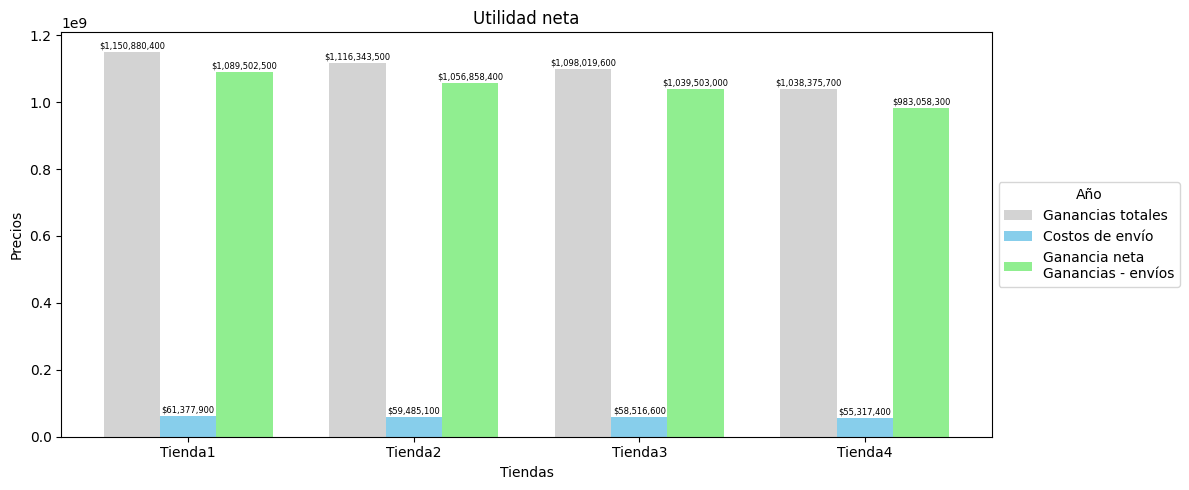

Lor porcentajes de venta en cada tienda, respecto al total de ganancias, estan dados por:
Tienda1 = 26.1%, con un promedio de costos de envío por $26,019
Tienda2 = 25.4%, con un promedio de costos de envío por $25,216
Tienda3 = 24.9%, con un promedio de costos de envío por $24,806
Tienda4 = 23.6%, con un promedio de costos de envío por $23,450
Los que nos muetra que la Tienda 1 Tiene un mayor porcentaje de ganancias netas respecto a las ganancias totales y los costos de los envíos.
Además podemos evidencia que la tienda 4 es la que tiene un menor porcetaje de ganancias, a pesar de que sus costos de envío sean menores.


In [23]:
grafico(lista_tiendas_string,precio_total_tiendas,costo_envio,total_costos)
print('Lor porcentajes de venta en cada tienda, respecto al total de ganancias, estan dados por:')
for i in range(len(lista_tiendas_string)):
    print(f'{lista_tiendas_string[i]} = {round(total_costos[i]*100/sum(total_costos),1)}%, con un promedio de costos de envío por ${costo_envio_promedio[i]:,.0f}')
print('Los que nos muetra que la Tienda 1 Tiene un mayor porcentaje de ganancias netas respecto a las ganancias totales y los costos de los envíos.')
print('Además podemos evidencia que la tienda 4 es la que tiene un menor porcetaje de ganancias, a pesar de que sus costos de envío sean menores.')

# 2. Ventas por categoría, productos más y menos vendidos

In [32]:
def obtener_categoria_precio(lista_df):
    lista_de_listas = []
    for df in lista_df:
        cat_precio = [(cat, precio) for cat, precio in zip(df['Categoría del Producto'], df['Precio'])]
        lista_de_listas.append(cat_precio)
    return lista_de_listas

lista_de_categorias_price = obtener_categoria_precio(lista_tiendas)

In [34]:
categorias = []
contador_tienda = [0]*4
suma_de_precios = []

for i in tienda1['Categoría del Producto']:
  if i not in categorias:
    categorias.append(i)
  categorias = sorted(categorias)

def suma_precios_categ(lista_larga, categoria):
  contador_cat = [0]*8
  sumas_precios_cat = [0]*8
  for i, j in lista_larga:
    if i in categoria:
# Si la categoría i está dentro de la lista categoria, encuentra su índice con categoria.index
      indice = categoria.index(i)
      contador_cat[indice]+=1
# Usa ese índice para sumar el precio j en la posición correspondiente de una lista llamada
      sumas_precios_cat[indice]+=j
  return sumas_precios_cat, contador_cat

suma_de_precios = []
#suma_precios_categ(lista_de_categorias_price[0],categorias)
for i in range(len(lista_de_categorias_price)):
  suma_de_precios.append(suma_precios_categ(lista_de_categorias_price[i],categorias))

In [40]:
def grafico_categorias_precio(t1,t2,t3,t4,categorias):
  #juntamos las categorias comunes
  datos = [t1, t2, t3, t4]
  n_tiendas = len(datos)
  ancho_barra = 0.2
  x = np.arange(len(categorias))

  colores = ['lightgray', 'skyblue', 'lightgreen', 'lightcoral']
  nombres_tiendas = lista_tiendas_string
  fig, ax = plt.subplots(figsize=(12,5))
  for i in range(n_tiendas):
     ax.bar(x + i * ancho_barra, datos[i], ancho_barra, label=nombres_tiendas[i], color=colores[i])

  ax.set_xticks(x + ancho_barra * (n_tiendas - 1) / 2)
  ax.set_xticklabels(categorias, rotation=45)
  ax.set_xlabel('Categorías de productos')
  ax.set_ylabel('Ganancia')
  ax.set_title('Ganancia por categoría en cada tienda')
  ax.legend(title='Tiendas')

  plt.tight_layout()
  return plt.show()

def grafico_categorias_contador(t1,t2,t3,t4,categorias):

  datos = [t1, t2, t3, t4]
  n_tiendas = len(datos)
  ancho_barra = 0.2

  x = np.arange(len(categorias))

  colores = ['lightgray', 'skyblue', 'lightgreen', 'lightcoral']
  nombres_tiendas = lista_tiendas_string

#Creamos el grafico
  fig, ax = plt.subplots(figsize=(12,5))
  for i in range(n_tiendas):
     ax.bar(x + i * ancho_barra, datos[i], ancho_barra, label=nombres_tiendas[i], color=colores[i])
  ax.set_xticks(x + ancho_barra * (n_tiendas - 1) / 2)
  ax.set_xticklabels(categorias, rotation=45)
  ax.set_xlabel('Categorías de productos')
  ax.set_ylabel('Cantidad de productos vendidos')
  ax.set_title('Cantidad de productos por categoría en cada tienda')
  ax.legend(title='Tiendas')

  plt.tight_layout()
  return plt.show()

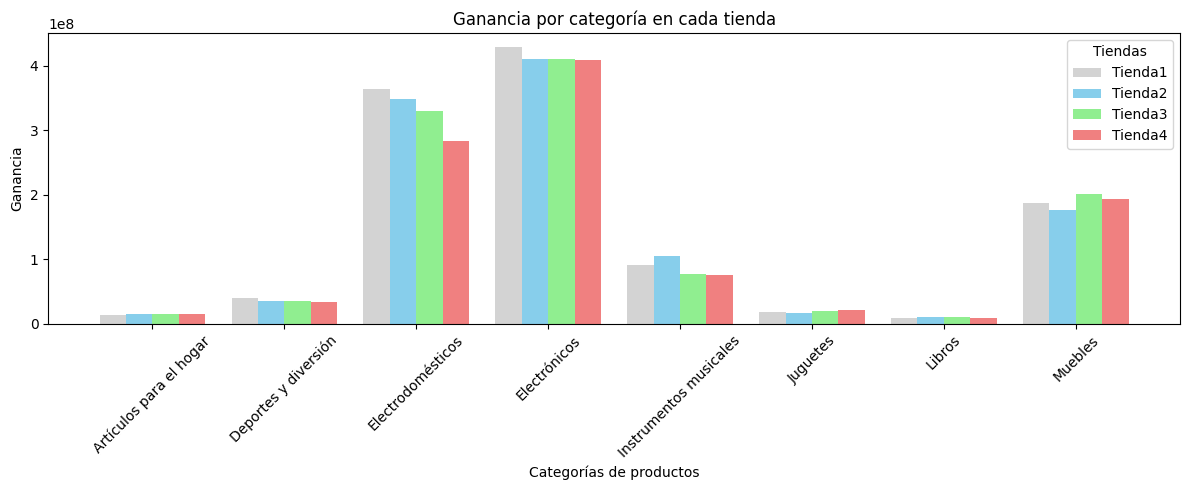

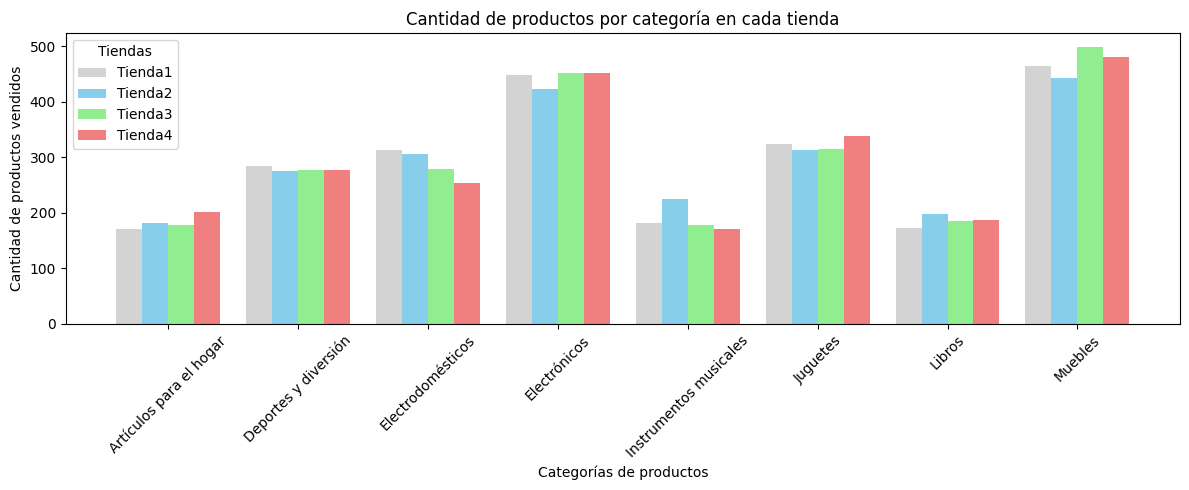

De los diagramas mostrados referentes a las categorias, es evidente que la los elementos Electronicos, fueron por los que más se obtuvo utilidad en todas las tiendas.
Siendo la Tienda 1 la que más registro ingresos por estos elementos.
Aunque en la segunda tabla se observa que la mayor cantidad de productos vendidos fueron los muebles, seguidos de los elementos electronicos.
Los articulos del hogar, los instrumentos musicales y libros feron los elementos menos vendidos.
Los articulos del hogar, juguetes y libros fueron os que registraron menos utilidad.


In [41]:
grafico_categorias_precio(suma_de_precios[0][0], suma_de_precios[1][0], suma_de_precios[2][0], suma_de_precios[3][0], categorias)
grafico_categorias_contador(suma_de_precios[0][1], suma_de_precios[1][1], suma_de_precios[2][1], suma_de_precios[3][1], categorias)

print('De los diagramas mostrados referentes a las categorias, es evidente que la los elementos Electronicos, fueron por los que más se obtuvo utilidad en todas las tiendas.')
print('Siendo la Tienda 1 la que más registro ingresos por estos elementos.')
print('Aunque en la segunda tabla se observa que la mayor cantidad de productos vendidos fueron los muebles, seguidos de los elementos electronicos.')
print('Los articulos del hogar, los instrumentos musicales y libros feron los elementos menos vendidos.')
print('Los articulos del hogar, juguetes y libros fueron os que registraron menos utilidad.')

# 3. Calificación promedio de la tienda


In [43]:
#Calcularemos la media de las calificaciones de cada tienda
media_grupal = []
moda_grupal = []
variaza = []
desviacion_estandar = []
tabla = []

for i in range(len(lista_tiendas)):
  media_grupal.append(round(float(lista_tiendas[i]['Calificación'].mean()),3))

  variaza.append(float(round(np.var(lista_tiendas[i]['Calificación'],ddof=0),3)))
  desviacion_estandar.append(round(float(np.sqrt(variaza[i])),3))
tabla.append(media_grupal)
tabla.append(desviacion_estandar)

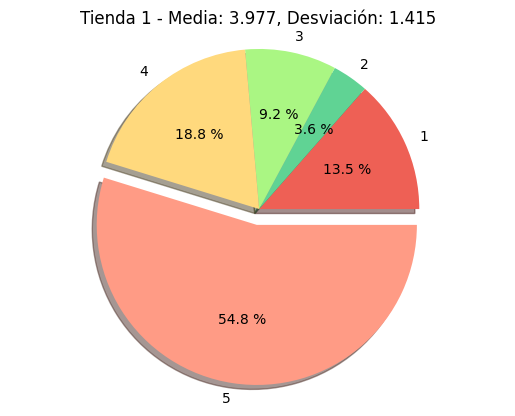

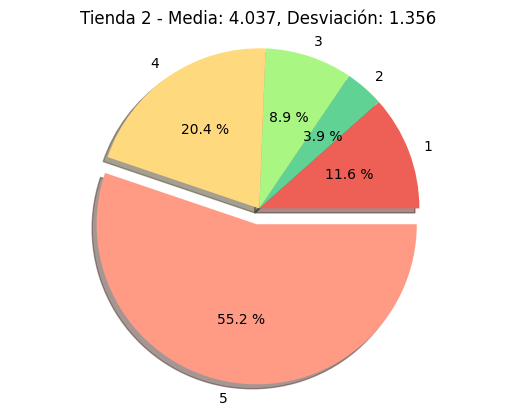

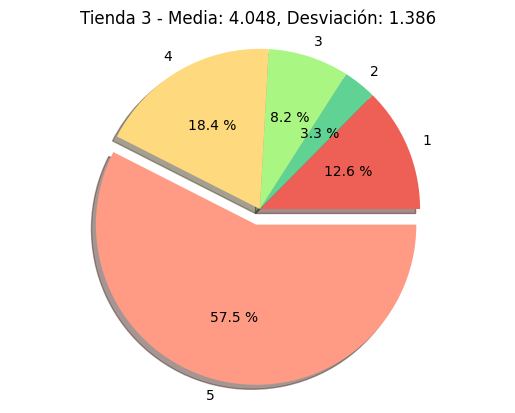

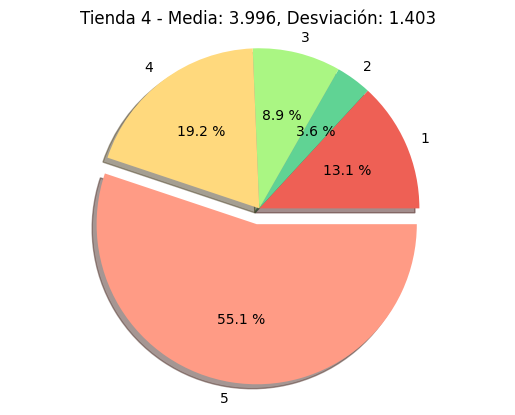

Los graficos circulares nos muestran una distribucion de los conjuntos de datos.
En estos se puede evidencia que la Tienda1 tiene un mayor porcentaje de calificaciones sobre 5
Si nos enfocamos en la relacion que existe entre las calificaciones positivas (5-4) y las negativas (2-1), obtenermos lo siguiente
Tienda1:
Calificaiones entre 4 y 5 = 73.59%
Calificaiones entre 1 y 2 = 17.17%
Con un factor de 23.0%
Tienda2:
Calificaiones entre 4 y 5 = 75.63%
Calificaiones entre 1 y 2 = 15.52%
Con un factor de 21.0%
Tienda3:
Calificaiones entre 4 y 5 = 75.88%
Calificaiones entre 1 y 2 = 15.94%
Con un factor de 21.0%
Tienda4:
Calificaiones entre 4 y 5 = 74.34%
Calificaiones entre 1 y 2 = 16.75%
Con un factor de 23.0%
Con los datos anteriores podemos afirmar que las Tiendas 2 y 3 tienen un mejor factor de calificaciones positivas, respecto a las demas tiendas.
Aunque destacamos que la Tienda 3 cuenta con un mayor numero de calificaciones positivas.


In [45]:
def frecuencia(calificaciones):
    frec = [0,0,0,0,0]
    for i in calificaciones:
        if i == 1:
            frec[0]+=1
        elif i == 2:
            frec[1]+=1
        elif i == 3:
            frec[2]+=1
        elif i == 4:
            frec[3]+=1
        else:
            frec[4]+=1
    return frec

lista_frec = []
for i in range(len(lista_tiendas)):
    lista_frec.append(frecuencia(lista_tiendas[i]['Calificación']))

def grafico_circular(lista_frec):

    for j in range(len(lista_frec)):
        #if lista_frec[j] is max(lista_frec) or lista_frec[j] is min(lista_frec):
        colores = ["#EE6055","#60D394","#AAF683","#FFD97D","#FF9B85"]
        desfase = (0, 0, 0, 0, 0.1)
        plt.pie(lista_frec[j], labels=[1,2,3,4,5], autopct="%0.1f %%", colors=colores, explode=desfase, shadow=True)
        plt.title(f"Tienda {j + 1} - Media: {media_grupal[j]}, Desviación: {desviacion_estandar[j]}")
        plt.axis("equal")
        plt.show()

grafico_circular(lista_frec)
#print(tabulate(tabla, headers=lista_tiendas_string, tablefmt='line'))
print(f'Los graficos circulares nos muestran una distribucion de los conjuntos de datos.')
print(f'En estos se puede evidencia que la {lista_tiendas_string[0]} tiene un mayor porcentaje de calificaciones sobre 5')
print('Si nos enfocamos en la relacion que existe entre las calificaciones positivas (5-4) y las negativas (2-1), obtenermos lo siguiente')

for i in range(len(lista_frec)):
    print(f'{lista_tiendas_string[i]}:')
    print(f'Calificaiones entre 4 y 5 = {round(((lista_frec[i][3]+lista_frec[i][4])/sum(lista_frec[i]))*100,2)}%')
    print(f'Calificaiones entre 1 y 2 = {round(((lista_frec[i][0]+lista_frec[i][1])/sum(lista_frec[i]))*100,2)}%')
    print(f'Con un factor de {round((((lista_frec[i][0]+lista_frec[i][1])/sum(lista_frec[i]))*100)/(((lista_frec[i][3]+lista_frec[i][4])/sum(lista_frec[i]))*100),2)*100}%')
print('Con los datos anteriores podemos afirmar que las Tiendas 2 y 3 tienen un mejor factor de calificaciones positivas, respecto a las demas tiendas.')
print('Aunque destacamos que la Tienda 3 cuenta con un mayor numero de calificaciones positivas.')

Conclusiones

*   La tienda 1 es la que más ingresos netos genera, a pesar de tener costos de envio promedio más altos.
*   La Tienda 4 es la que genera menos ganancias netas. Aunque sus costos de envío son bajos, el volumen de ventas es reducido, lo que disminuye su rentabilidad.
*   La categoría "Electrónicos" es la más lucrativa en todas las tiendas, con la Tienda 1 como líder en ingresos por esta categoría.
